In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

from sklearn.model_selection import cross_val_score,GridSearchCV
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("microcreditdefaulter.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016


In [4]:
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,6/17/2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,6/12/2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,7/29/2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,7/25/2016
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,7/7/2016


In [5]:
df.sample()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
124030,124031,1,56233I90847,800.0,14.22,14.22,522.18,522.18,19.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,6/27/2016


In [6]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,6/17/2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,6/12/2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,7/29/2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,7/25/2016


Analyzing the EDA

In [6]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [7]:
df.shape

(209593, 37)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [9]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [12]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            146328
daily_decr90            155483
rental30                131338
rental90                139036
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     23907
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     22694
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

<AxesSubplot:>

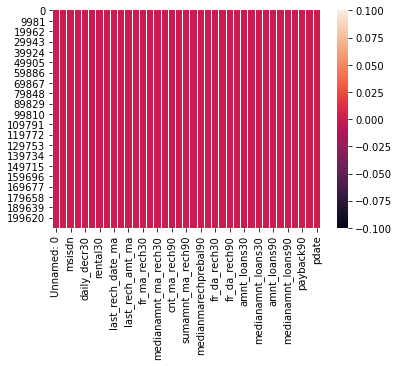

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.describe() #statistical summary

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [15]:
# Now we can drop features like 'pcircle','pdate','Unnamed: 0' which have leass importance in regards to other variables

df.drop(['pcircle','pdate','Unnamed: 0','msisdn'],axis=1,inplace=True)

In [16]:
corr = df.corr()

In [17]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


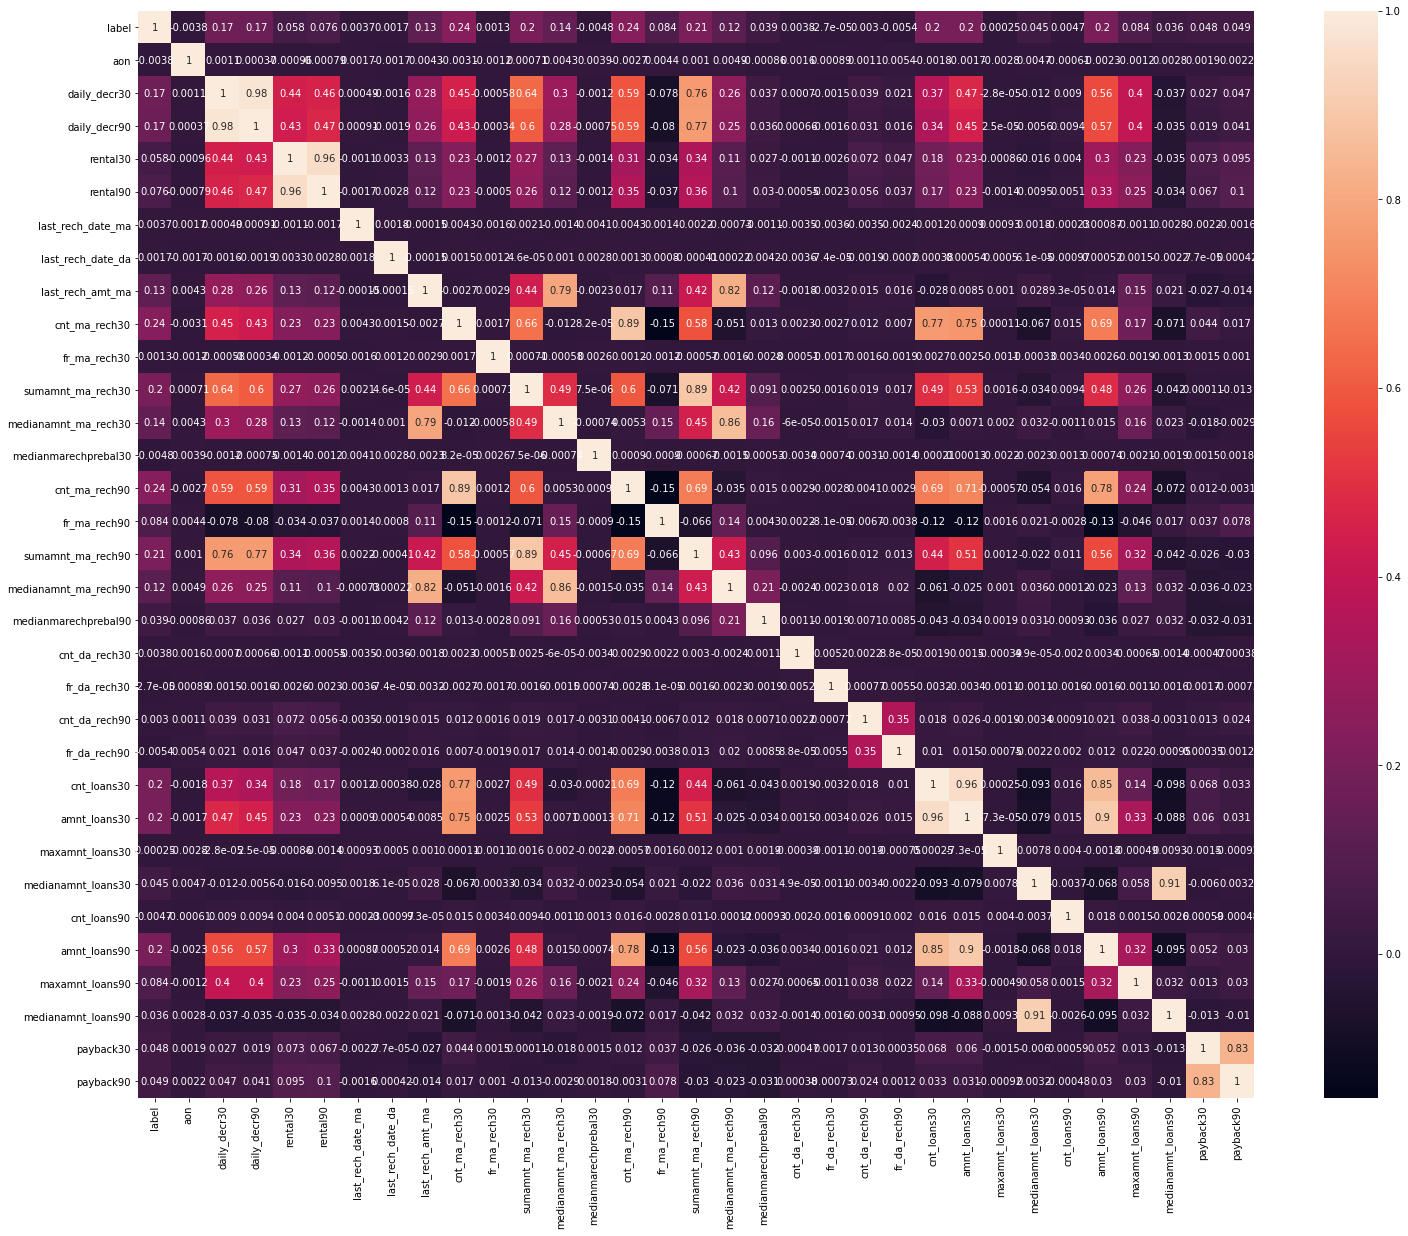

In [18]:
# checking correlation of independent variables with 'label' variable

plt.figure(figsize=(25,20))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [7]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [19]:
corr_matrix['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon       

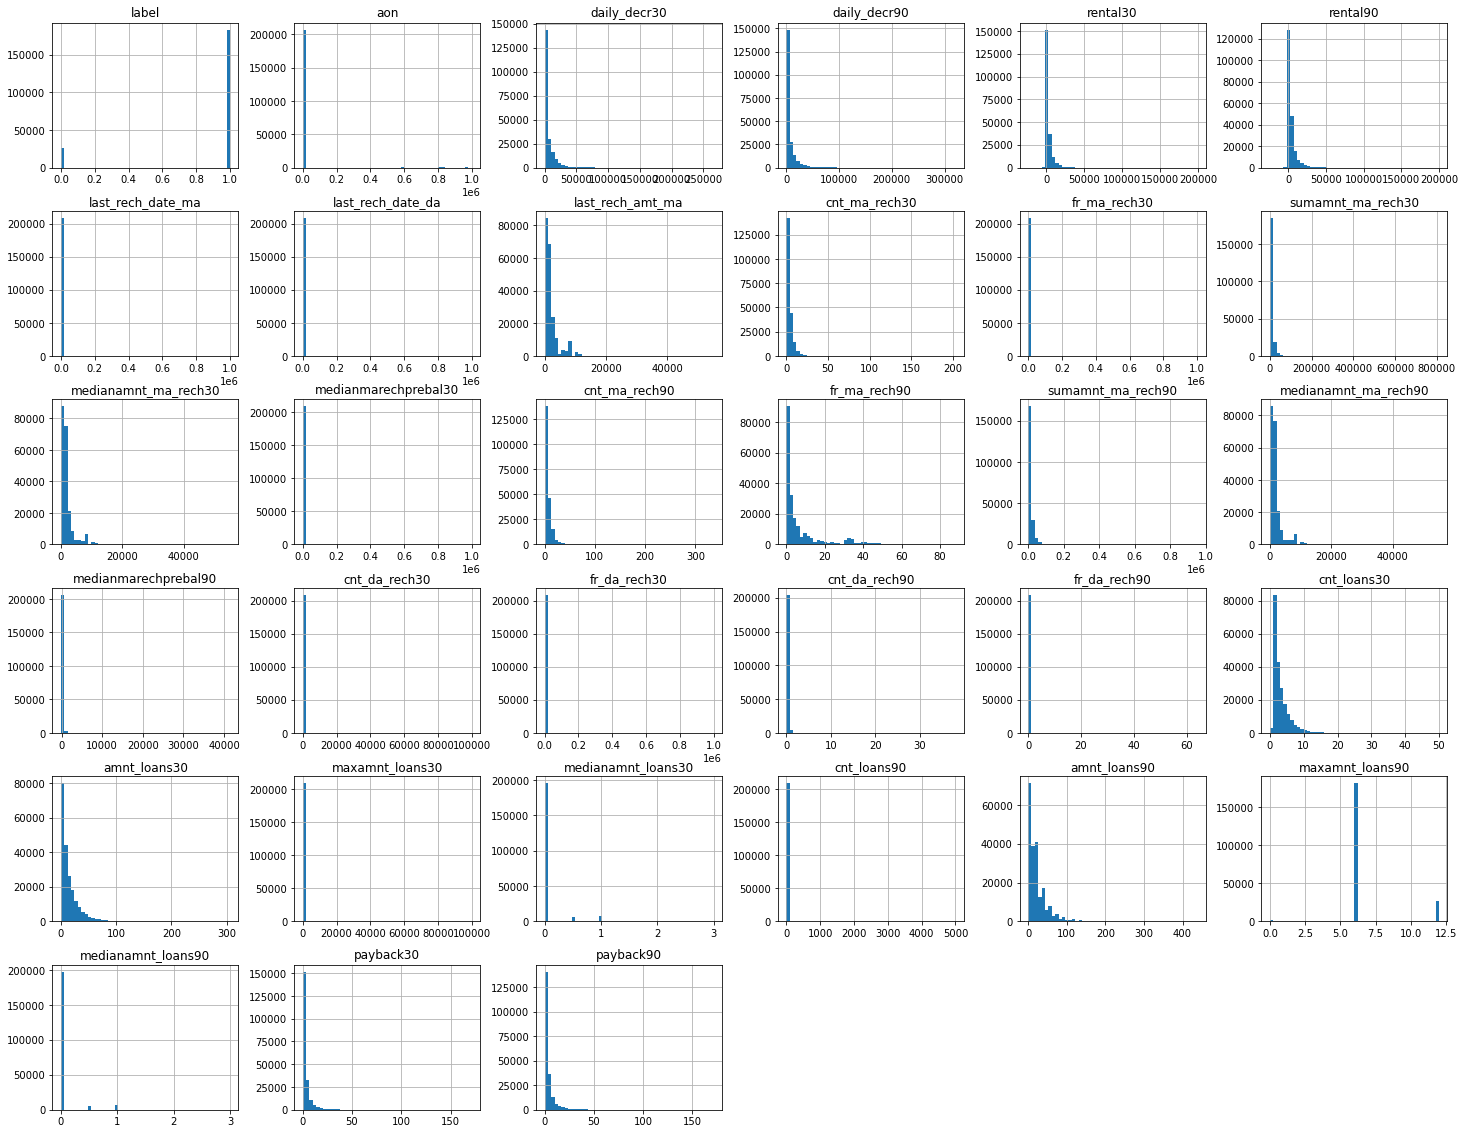

In [20]:
# Lets look at the distribution of all the numeric variables
%matplotlib inline

df.hist(bins=50, figsize=(25,20))
plt.show()

<AxesSubplot:xlabel='label', ylabel='Density'>

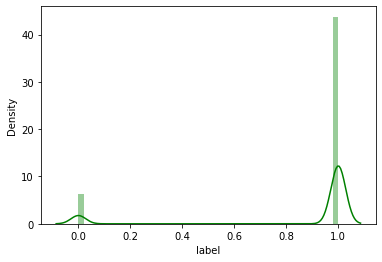

In [21]:
# checking distibution of label feature

sns.distplot(df['label'], color = 'green')

In [22]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

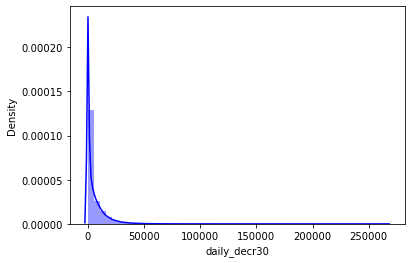

In [23]:
# checking distibution of daily_decr30 feature

sns.distplot(df['daily_decr30'], color = 'blue')

<AxesSubplot:xlabel='rental90', ylabel='Density'>

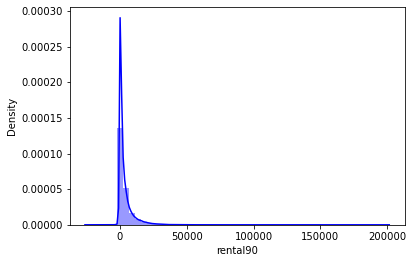

In [24]:
# checking distibution of rental90 feature

sns.distplot(df['rental90'], color = 'blue')

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

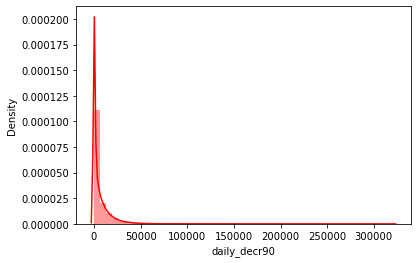

In [25]:
# checking distibution of daily_decr90 feature

sns.distplot(df['daily_decr90'], color = 'red')

In [26]:
# Clearly daily_decr90 feature is rightly skewed


<AxesSubplot:xlabel='payback30', ylabel='Density'>

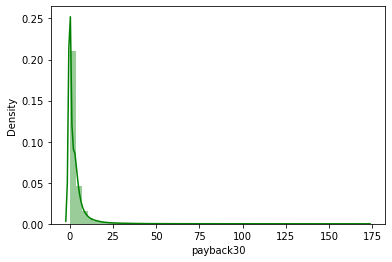

In [27]:
# checking distibution of payback30 feature

sns.distplot(df['payback30'], color = 'green')

<AxesSubplot:xlabel='payback90', ylabel='Density'>

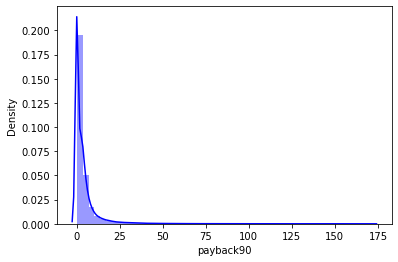

In [28]:
# checking distibution of payback90 feature

sns.distplot(df['payback90'], color = 'blue')

<AxesSubplot:xlabel='label', ylabel='rental30'>

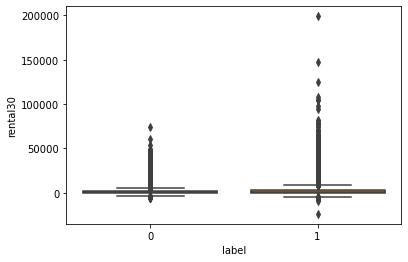

In [29]:
# Relation between label and rental30

sns.boxplot(x='label',y='rental30',data=df)

<AxesSubplot:xlabel='label', ylabel='rental90'>

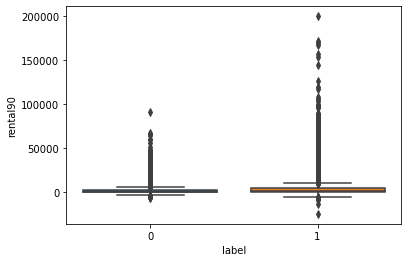

In [30]:
# Relation between label and rental90

sns.boxplot(x='label',y='rental90',data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

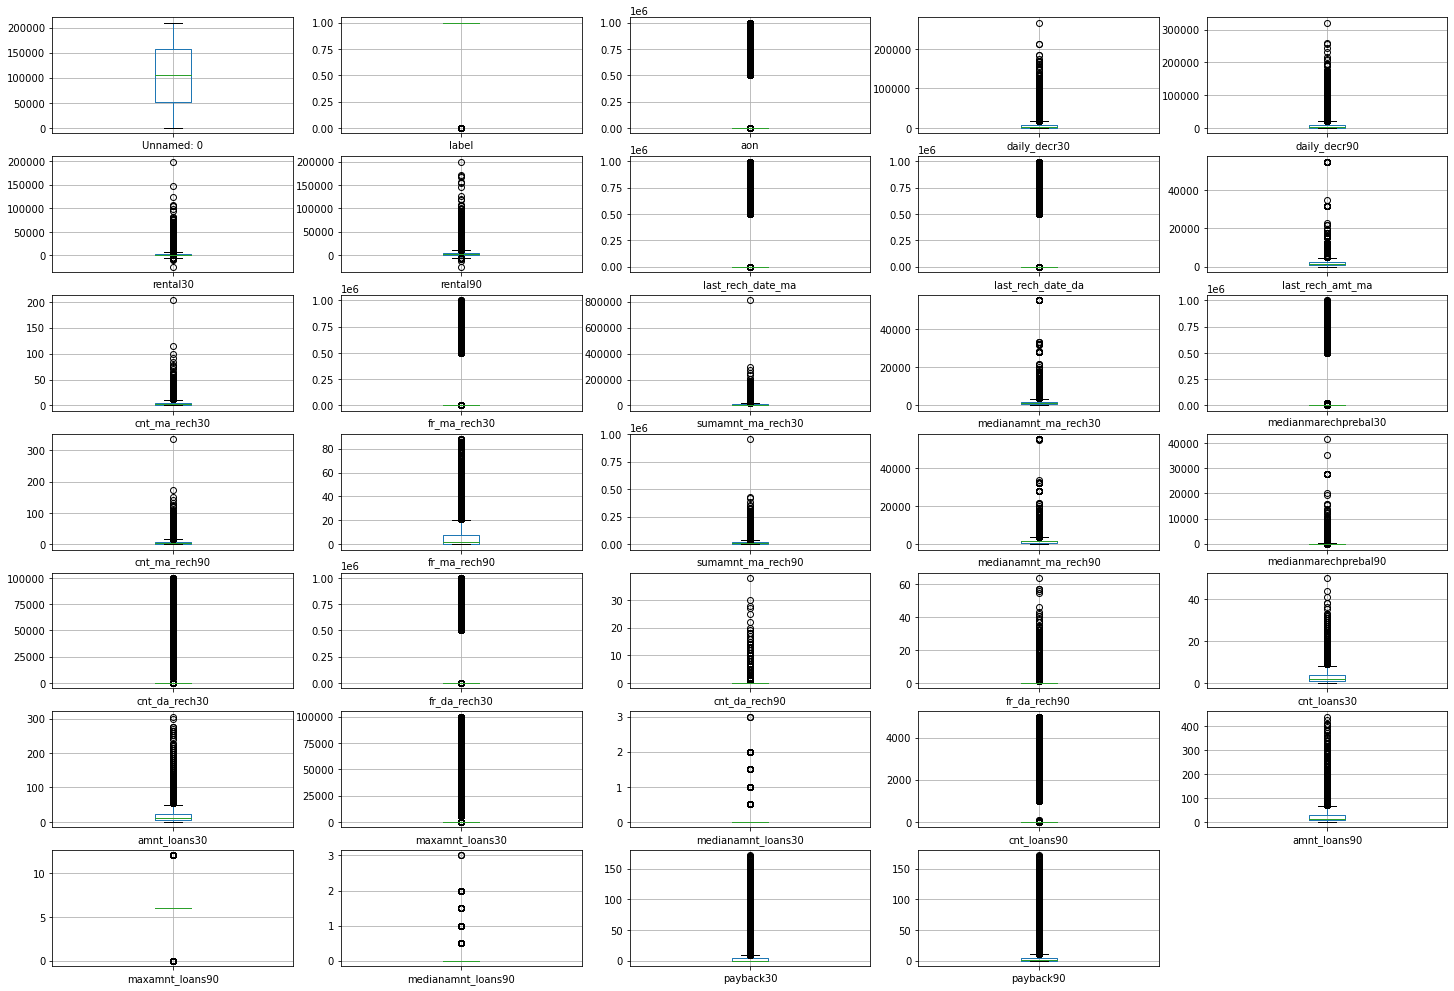

In [8]:
# Checking outliers in data


df.plot(kind='box', subplots=True, layout=(8,5), figsize=(25,20), grid=True)
plt.show

# ENCODING

In [32]:

#changing object dtype into numerical form
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [33]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [34]:
#Removing outliers and unrealistic values

# Position of the Outlier
index=np.where((df['fr_ma_rech30']>1000)|(df['last_rech_date_da']>1000)|(df['last_rech_date_ma']>1000)|(df['aon']>20000))

In [35]:
index

(array([    30,     53,     65, ..., 209531, 209533, 209576], dtype=int64),)

In [36]:
df=df.drop(df.index[index])   #Removing outliers and unrealistic values

In [37]:
df.shape

(204406, 33)

In [38]:
# Splitting dataset into X and Y

X=df.drop('label',axis=1)
y=df.label

In [39]:
# Scaling the dataset and normalizing feature variables

from sklearn.preprocessing import StandardScaler 

scale = StandardScaler()
X_features=X
X= scale.fit_transform(X)

In [40]:
# Balancing unbalanced dataset

from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y)

# DATALOSS

In [57]:
dataloss = ((209593-204406)/209593)*100

In [58]:
dataloss

2.4747963911008477

In [59]:
df.skew() #checking the skewness of the data

label                   -2.270494
aon                      0.945961
daily_decr30             3.932830
daily_decr90             4.256544
rental30                 4.548281
rental90                 4.448026
last_rech_date_ma        3.125975
last_rech_date_da        9.666063
last_rech_amt_ma         3.691154
cnt_ma_rech30            3.225050
fr_ma_rech30             2.020326
sumamnt_ma_rech30        6.433271
medianamnt_ma_rech30     3.457014
medianmarechprebal30    14.883804
cnt_ma_rech90            3.423710
fr_ma_rech90             2.289007
sumamnt_ma_rech90        4.932287
medianamnt_ma_rech90     3.716260
medianmarechprebal90    44.746353
cnt_da_rech30           17.776323
fr_da_rech30            14.750856
cnt_da_rech90           27.370073
fr_da_rech90            29.188625
cnt_loans30              2.702543
amnt_loans30             2.953774
maxamnt_loans30         17.624496
medianamnt_loans30       4.553808
cnt_loans90             16.613360
amnt_loans90             3.140420
maxamnt_loans9

label


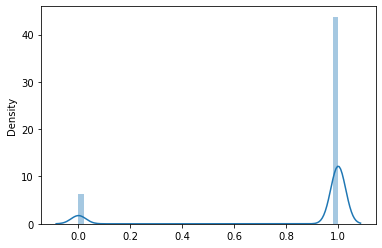

aon


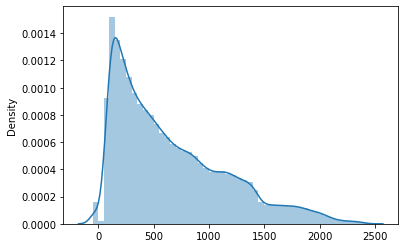

daily_decr30


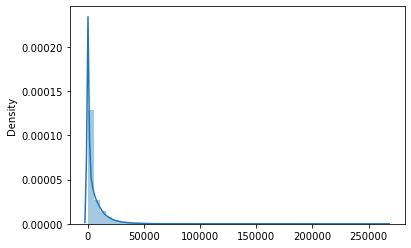

daily_decr90


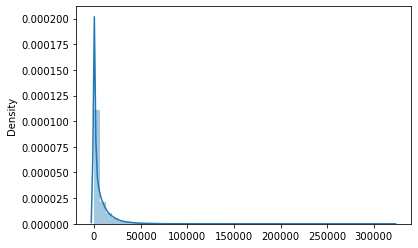

rental30


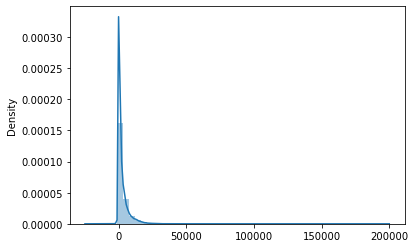

rental90


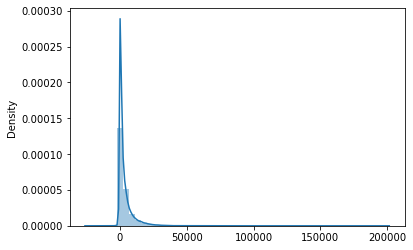

last_rech_date_ma


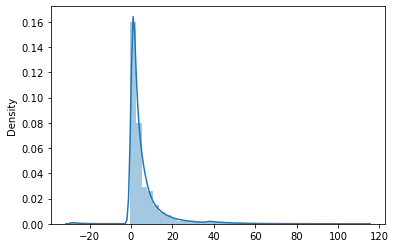

last_rech_date_da


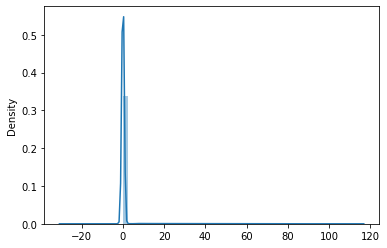

last_rech_amt_ma


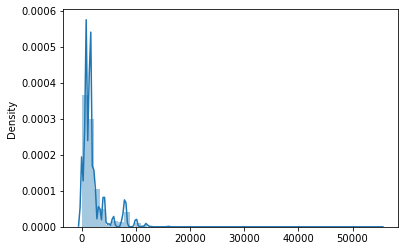

cnt_ma_rech30


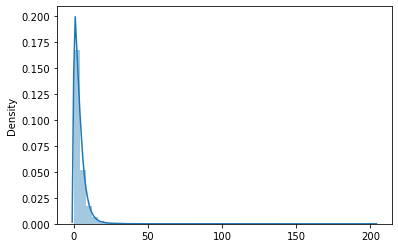

fr_ma_rech30


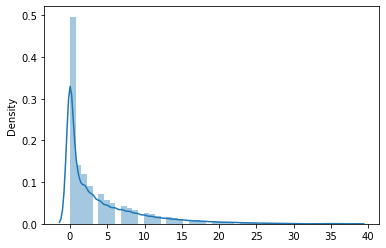

sumamnt_ma_rech30


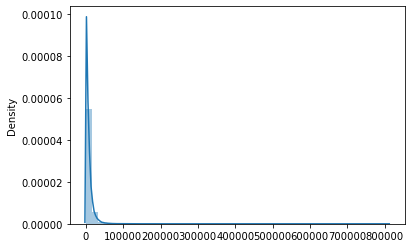

medianamnt_ma_rech30


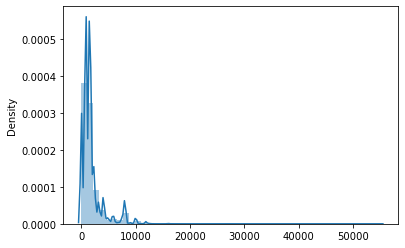

medianmarechprebal30


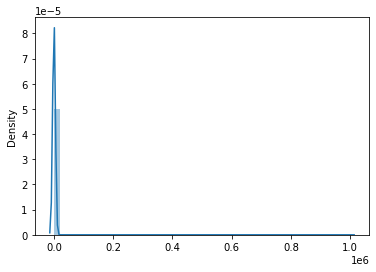

cnt_ma_rech90


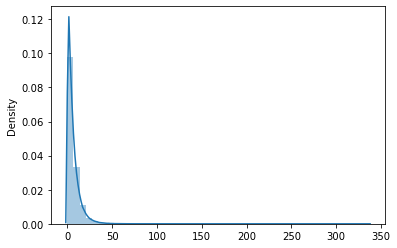

fr_ma_rech90


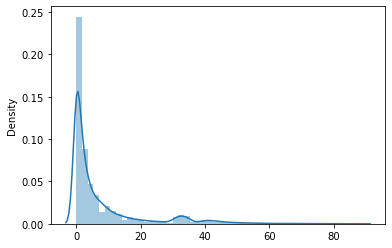

sumamnt_ma_rech90


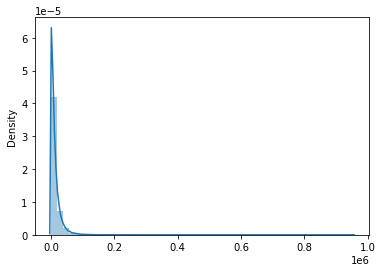

medianamnt_ma_rech90


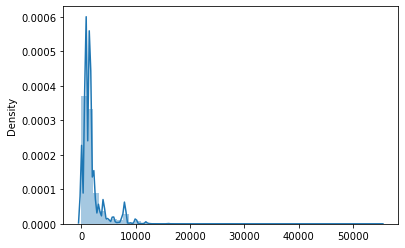

medianmarechprebal90


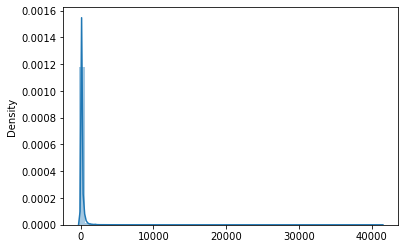

cnt_da_rech30


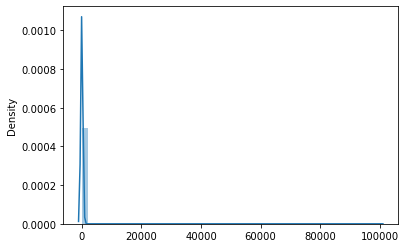

fr_da_rech30


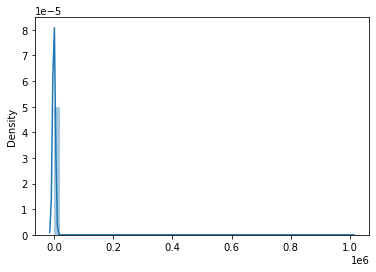

cnt_da_rech90


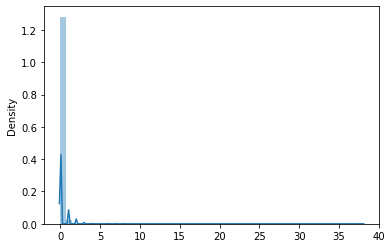

fr_da_rech90


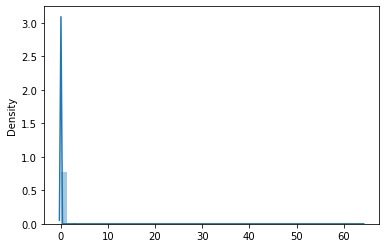

cnt_loans30


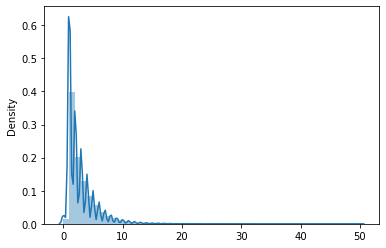

amnt_loans30


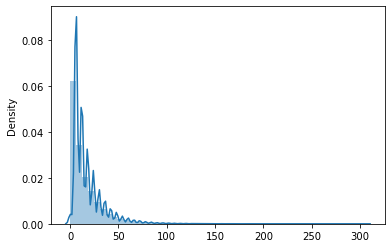

maxamnt_loans30


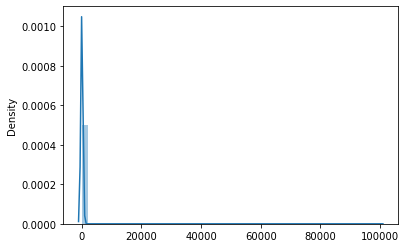

medianamnt_loans30


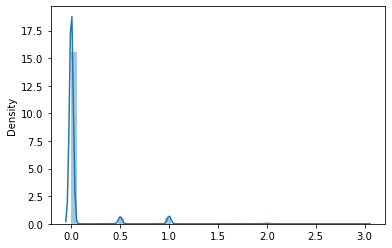

cnt_loans90


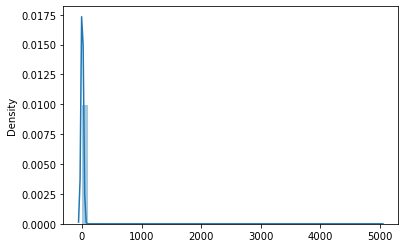

amnt_loans90


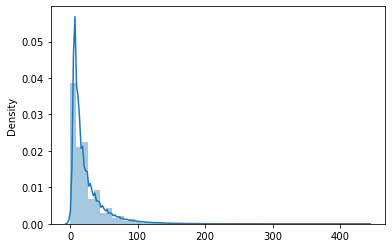

maxamnt_loans90


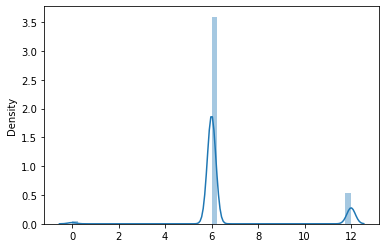

medianamnt_loans90


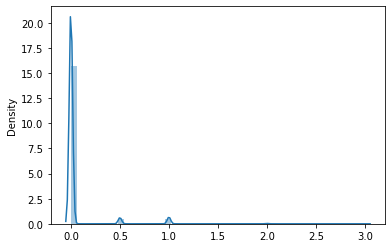

payback30


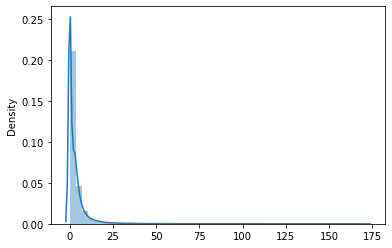

payback90


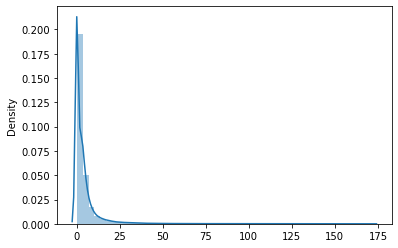

In [60]:
#checking distribution graph
for i in df.columns:
    print(i)
    plt.figure()
    sns.distplot(x=df[i])
    plt.show()

# HYPERPARAMETER TUNING

In [41]:
# Training the model using LogisticRegression and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_lr_1 = LogisticRegression()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_lr_1.fit(X_train, y_train)
    y_pred_lr_1 = model_lr_1.predict(X_test)
    score=accuracy_score(y_test,y_pred_lr_1)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state for LogisticRegression : ',state)
print('best accuracy score for LogisticRegression : ',score_s)

best random_state for LogisticRegression :  7
best accuracy score for LogisticRegression :  0.7682253090732926


In [42]:
# Accuracy score for LogisticRegression on training data

y_pred_lr_train = model_lr_1.predict(X_train)
score_train=accuracy_score(y_train,y_pred_lr_train)
print('best accuracy score for LogisticRegression on training data : ',score_train)

best accuracy score for LogisticRegression on training data :  0.7679684411845735


In [43]:
# finding classification_report for LogisticRegression

print(classification_report(y_test, y_pred_lr_1))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78     53542
           1       0.79      0.72      0.75     53795

    accuracy                           0.76    107337
   macro avg       0.77      0.76      0.76    107337
weighted avg       0.77      0.76      0.76    107337



In [44]:
# finding cross validation score 

cvs = cross_val_score(LogisticRegression(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print("cross_val_score for LogisticRegression : ",cvs)

cross_val_score for LogisticRegression :  0.7640794943949303


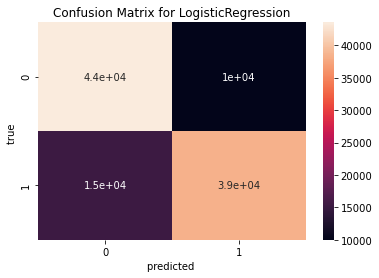

In [45]:
# confusion matrix of LogisticRegression model

cm=confusion_matrix(y_test,y_pred_lr_1)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

In [46]:
# Training the model using DecisionTreeClassifier and evaluating the model

import numpy as np

from sklearn.model_selection import train_test_split

model_dtc = DecisionTreeClassifier()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_dtc.fit(X_train, y_train)
    y_pred_dtc = model_dtc.predict(X_test)
    score=accuracy_score(y_test,y_pred_dtc)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state for DecisionTreeClassifier : ',state)
print('best accuracy score for DecisionTreeClassifier : ',score_s)

best random_state for DecisionTreeClassifier :  20
best accuracy score for DecisionTreeClassifier :  0.8867119446230097


In [47]:
# finding classification_report for DecisionTreeClassifier

print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     53542
           1       0.89      0.87      0.88     53795

    accuracy                           0.88    107337
   macro avg       0.88      0.88      0.88    107337
weighted avg       0.88      0.88      0.88    107337



In [48]:
# finding cross validation score for DecisionTreeClassifier 

cvs = cross_val_score(DecisionTreeClassifier(), X_test, y_test, scoring='accuracy', cv = 10).mean()
print("cross_val_score for DecisionTreeClassifier  : ",cvs)

cross_val_score for DecisionTreeClassifier  :  0.8538901232068717


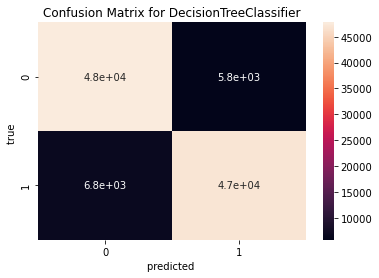

In [49]:
# confusion matrix of DecisionTreeClassifier  model

cm=confusion_matrix(y_test,y_pred_dtc)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

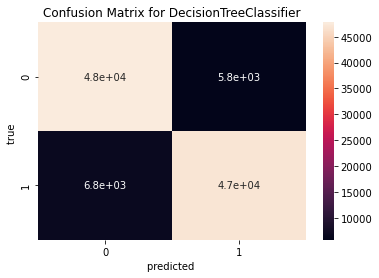

In [50]:
# confusion matrix of DecisionTreeClassifier  model

cm=confusion_matrix(y_test,y_pred_dtc)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [51]:
# HyperParameterTuning using DecisionTreeClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 6}
Best score is 0.870618441495771


In [52]:
tree_cv_predictions = tree_cv.predict(X_test)
 
# print classification report
print(classification_report(y_test, tree_cv_predictions))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     53542
           1       0.89      0.86      0.88     53795

    accuracy                           0.88    107337
   macro avg       0.88      0.88      0.88    107337
weighted avg       0.88      0.88      0.88    107337



In [53]:
accuracy_score(y_test,tree_cv_predictions)    # checking final accuracy


0.8766874423544537

# AUC-ROC CURVE

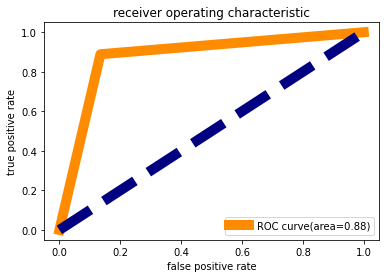

In [54]:
# AUC_ROC curve

from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(tree_cv_predictions,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

# SAVING THE MODEL

In [55]:
# Exporting the model through pickle

import pickle
filename='loan_app_status.pkl'
pickle.dump(tree_cv,open(filename,'wb'))

In [56]:
# Conclusion:

import numpy as np
a=np.array(y_test)
predicted=np.array(tree_cv.predict(X_test))
df_com=pd.DataFrame({'original':a,'predcited':predicted},index=range(len(a)))
df_com.head(20)

,original,predcited
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
5,1,0
6,1,1
7,1,1
8,0,0
9,0,0


# Clearly above data shows that  DecisionTtreeClassifer model is very good enough to predict 'MicroCreditDefaulter"
